In [69]:
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
from tqdm import tqdm
from colors import _get_colors

100%|██████████| 15/15 [00:00<00:00, 113155.68it/s]


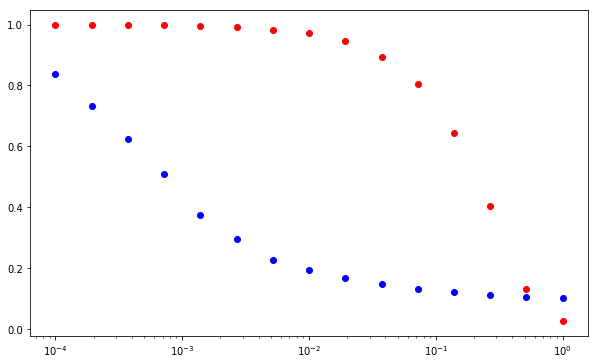

In [62]:
def makeGraph(N, K, p):
    G = nx.Graph()
    for i in range(N):
        for j in range(i - K, i + K + 1):
            if i == j: continue
            G.add_edge(i, j % N)

    s = set(range(N))
    for x in range(K):
        for i in range(N):
            if random.random() < p:
                j = (i + x + 1) % N
                choices = list(s - set(G[i]).union({i}))
                if not choices: continue
                k = random.choice(choices)
                G.remove_edge(i, j)
                G.add_edge(i, k)
    return G

def C(G, n):
    nbrs = list(G[n])
    s = len(nbrs)
    max_connections = (s**2 - s) / 2
    if max_connections == 0: return 0
    actual_connections = 0
    for i in range(s-1):
        nnbrs = list(G[nbrs[i]])
        for j in range(i+1, s):
            if nbrs[j] in nnbrs:
                actual_connections += 1
    return actual_connections / max_connections

def avg_C(G):
    N = len(G.nodes)
    s = 0
    for i in range(N):
        s += C(G, i)
    return s / N

def avg_L(G):
    gen = nx.shortest_path_length(G)
    N = len(G.nodes)
    L = 0
    for i in range(N):
        d = next(gen)
        L += sum(d[1].values())
    L = L / N**2
    return L

ps = np.logspace(-4, 0, 15)
alpha = 0.01
N = 1000
#K = round(alpha * N)
K = 50
G0 = makeGraph(N, K, 0)
C0 = C(G0, 0)
L0 = avg_L(G0)
Lsss = []
Csss = []

for p in tqdm(ps):
    continue
    CR = 0
    LR = 0
    TRIALS = 20
    for i in range(TRIALS):
        G = makeGraph(N, K, p)
        CR += avg_C(G)
        LR += avg_L(G)
    CR /= TRIALS
    LR /= TRIALS
    
    Css.append((CR / C0) if C0 > 0 else CR)
    Lss.append(LR / L0)
    
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.semilogx(ps, Css, 'ro')
ax.semilogx(ps, Lss, 'bo')
plt.show()

In [60]:
print(Csss)
print(Lsss)

[0.9996982360502978, 0.9994952256786592, 0.9989216156321588, 0.9978303884762328, 0.9960118073336127, 0.9922896493532068, 0.9854524651606226, 0.9718801613449606, 0.9453530497402682, 0.897390224397093, 0.809839535914091, 0.6607898761359069, 0.4399502004282697, 0.20907889922444714, 0.13368162353045632]
[0.7699307103825137, 0.6781814207650273, 0.6088779599271402, 0.5520511657559198, 0.5136374134790528, 0.4884670491803277, 0.47602435336976306, 0.46264287795992715, 0.4407013114754098, 0.40994009107468116, 0.3767873952641165, 0.3538734244080145, 0.346536466302368, 0.34574892531876145, 0.34572355191256826]


In [64]:
a1 = 0.005
a2 = 0.010
a3 = 0.05
ps = np.logspace(-4, 0, 15)
Cs = [0.9996348484848439, 0.9985113636363597, 0.998944696969693, 0.9960757575757527, 0.9946151515151458, 0.9949772727272678, 0.9848712121212062, 0.9688575757575704, 0.9453512987012955, 0.8975565018314996, 0.8052639610389615, 0.6408396187146195, 0.39871182934712385, 0.11675343504534728, 0.012995477806507222]
Ls = [0.9639627777777775, 0.7917921428571429, 0.6341069047619046, 0.469622222222222, 0.3576133333333333, 0.2796091666666667, 0.2116050000000001, 0.1688009523809523, 0.13748341269841272, 0.11230341269841275, 0.09487654761904764, 0.0819724603174603, 0.07266932539682538, 0.06673103174603176, 0.06482059523809526]
Css = [0.9996399529688492, 0.9993733980011831, 0.9987991945914237, 0.9981188327721726, 0.9958586055701805, 0.9926800615554924, 0.9833931330736605, 0.9716373229046205, 0.9444050970701106, 0.893886699449605, 0.8039519941873507, 0.6454398615487825, 0.40404380679307245, 0.1322978550437523, 0.026548652283610287]
Lss = [0.8364323222003929, 0.733611489194499, 0.6241903339882122, 0.5100692770137525, 0.37560416895874266, 0.2971655363457761, 0.22721016895874266, 0.19595943811394892, 0.16767389390962675, 0.14776046365422396, 0.13244695874263263, 0.12071135559921414, 0.11115983497053047, 0.10558475442043225, 0.10367500589390963]
Csss = [0.9996982360502978, 0.9994952256786592, 0.9989216156321588, 0.9978303884762328, 0.9960118073336127, 0.9922896493532068, 0.9854524651606226, 0.9718801613449606, 0.9453530497402682, 0.897390224397093, 0.809839535914091, 0.6607898761359069, 0.4399502004282697, 0.20907889922444714, 0.13368162353045632]
Lsss = [0.7699307103825137, 0.6781814207650273, 0.6088779599271402, 0.5520511657559198, 0.5136374134790528, 0.4884670491803277, 0.47602435336976306, 0.46264287795992715, 0.4407013114754098, 0.40994009107468116, 0.3767873952641165, 0.3538734244080145, 0.346536466302368, 0.34574892531876145, 0.34572355191256826]

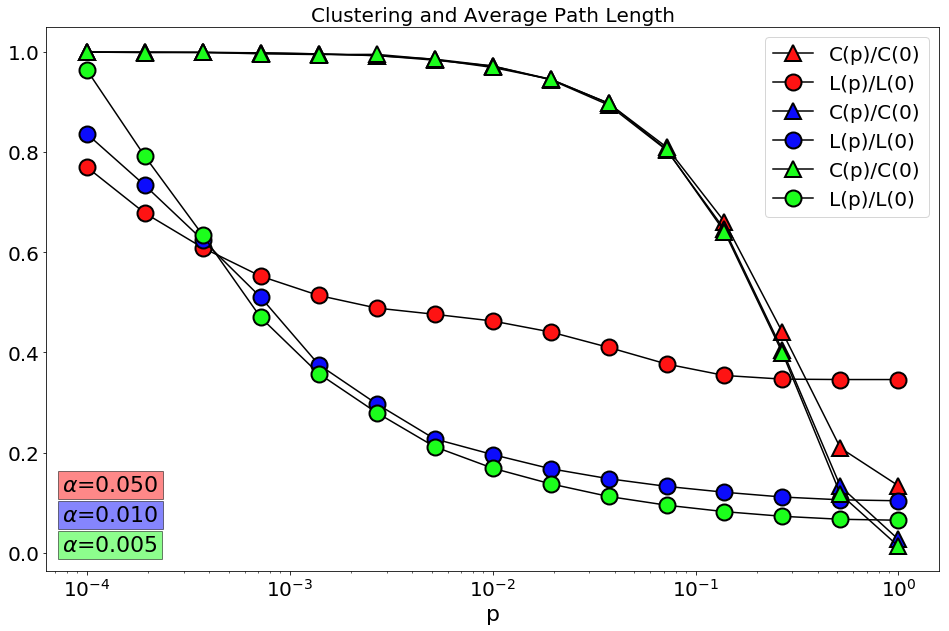

In [97]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)

c = _get_colors(3)
ax.semilogx(ps, Csss, '^-', color='k', mew=2, ms=16, mfc=c[0], label='C(p)/C(0)')
ax.semilogx(ps, Lsss, 'o-', color='k', mew=2, ms=16, mfc=c[0], label='L(p)/L(0)')
ax.semilogx(ps, Css, '^-', color='k', mew=2, ms=16, mfc=c[2], label='C(p)/C(0)')
ax.semilogx(ps, Lss, 'o-', color='k', mew=2, ms=16, mfc=c[2], label='L(p)/L(0)')
ax.semilogx(ps, Cs, '^-', color='k', mew=2, ms=16, mfc=c[1], label='C(p)/C(0)')
ax.semilogx(ps, Ls, 'o-', color='k', mew=2, ms=16, mfc=c[1], label='L(p)/L(0)')
ax.set_xlabel('p', fontsize=22)
ax.tick_params(labelsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.title('Clustering and Average Path Length', fontsize=20)

inv = ax.transData.inverted()
plt.text(*inv.transform((160,110)), '$\\alpha$=%.3f'%a1, bbox=dict(fc=c[1], alpha=0.5), fontsize=22)
plt.text(*inv.transform((160,140)), '$\\alpha$=%.3f'%a2, bbox=dict(fc=c[2], alpha=0.5), fontsize=22)
plt.text(*inv.transform((160,170)), '$\\alpha$=%.3f'%a3, bbox=dict(fc=c[0], alpha=0.5), fontsize=22)
plt.show()
#plt.savefig('small-world.png')

In [205]:
from matplotlib.patches import Ellipse, Wedge, Circle
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-1.15,1.15)
ax.set_ylim(-1.15,1.15)

theta = 2 * np.pi / N
r1 = 1

lines = []
for e in list(G.edges):
    n1, n2 = e
    x, y = (r1*np.cos(n1*theta), r1*np.cos(n2*theta)), (r1*np.sin(n1*theta), r1*np.sin(n2*theta))
    lines.append(Line2D(x, y, color='k', zorder=0))

nodes = [Circle(
            (r1*np.cos(i*theta), r1*np.sin(i*theta)),
            radius=1/N,
            ec='red',
            lw=2,
            fc='white',
            zorder=1
         ) for i in range(N)]
for n in nodes:
    ax.add_artist(n)
    n.set_clip_box(ax.bbox)
for l in lines:
    ax.add_artist(l)
    l.set_clip_box(ax.bbox)
    

#plt.show()
plt.savefig('pentagrama.png')